In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
#Loading COHA timeseeries data
ts_df = pd.read_csv('./data/SWOW_prediction/eval/time_series/ts_df.csv')
ts_df = ts_df.groupby(['words','year','property'])[['count','outputs_z']].mean().reset_index()
ts_df['property_z'] = ts_df['outputs_z']
ts_df = ts_df[ts_df['count'] >= 50]


In [3]:
#Loading average mfdness data
word_year_df = pd.read_csv('./data/SWOW_prediction/eval/word_year_mfdness.csv')

#Calculating average mfdness for each word-year pair
averages = word_year_df.groupby(['words','year'])[['average_mfdness']].mean().to_dict()['average_mfdness']

#Adding average mfdness to the ts_df
ts_df['average_mfdness'] = [averages[(w,y)] if (w,y) in averages else np.nan for w,y in zip(ts_df['words'], ts_df['year']) ]


rel_df = ts_df.loc[ts_df.property == 'previous_link'] #Moral relevance dataframe
pol_df = ts_df.loc[ts_df.property == 'polarity'] #Polarity dataframe

In [22]:
word_year_df

,words,year,average_mfdness
0,aaa,1930,0.039025
1,aaron,1860,0.023551
2,aaron,1880,0.084937
3,aaron,1890,0.092491
4,aaron,1950,0.037435
...,...,...,...
168762,zucchini,2000,0.028389
168763,zuleika,1880,0.042808
168764,zura,1910,0.026951
168765,zurich,1960,0.002891


In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr, spearmanr


### Let's compare moral relevance with average mfdness at each year

In [5]:
model = smf.ols(formula='outputs_z ~ average_mfdness + C(year)', data=rel_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              outputs_z   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     4108.
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        14:26:53   Log-Likelihood:            -2.0717e+05
No. Observations:              168767   AIC:                         4.144e+05
Df Residuals:                  168750   BIC:                         4.146e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7316      0.009    -80.490      0.000      -0.749      -0.714
C(year)[T.1860]     0.0302      0.012      2.528      0.011       0.007       0.054
C(year)[T.1870]     0.0095      0.012      0.800      0.424      -0.014       0.033
C(year)[T.1880]     0.0132      0.012      1.109      0.268      -0.010       0.036
C(year)[T.1890]     0.0039      0.012      0.327      0.744      -0.019       0.027
C(year)[T.1900]    -0.0360      0.012     -3.049      0.002      -0.059      -0.013
C(year)[T.1910]    -0.0372      0.012     -3.159      0.002      -0.060      -0.014
C(year)[T.1920]    -0.0433      0.012     -3.713      0.000      -0.066      -0.020
C(year)[T.1930]    -0.0207      0.012     -1.773      0.076      -0.044       0.002
C(year)[T.1940]     0.0183      0.012      1.572      0.116      -0.005       0.041
C(year)[T.1950]     0.0020      0.012      0.172      0.864      -0.021       0.025
C(year)[T.1960]    -0.0023      0.012     -0.198      0.843      -0.025       0.020
C(year)[T.1970]     0.0075      0.012      0.649      0.516      -0.015       0.030
C(year)[T.1980]     0.0102      0.012      0.884      0.377      -0.012       0.033
C(year)[T.1990]    -0.0159      0.011     -1.386      0.166      -0.038       0.007
C(year)[T.2000]     0.0062      0.011      0.546      0.585      -0.016       0.029
average_mfdness    14.8222      0.058    255.067      0.000      14.708      14.936
==============================================================================
Omnibus:                     8964.742   Durbin-Watson:                   0.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10533.700
Skew:                           0.582   Prob(JB):                         0.00
Kurtosis:                       3.379   Cond. No.                         29.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
pearsonr(rel_df.outputs_z, rel_df.average_mfdness)


PearsonRResult(statistic=0.5290247331572158, pvalue=0.0)

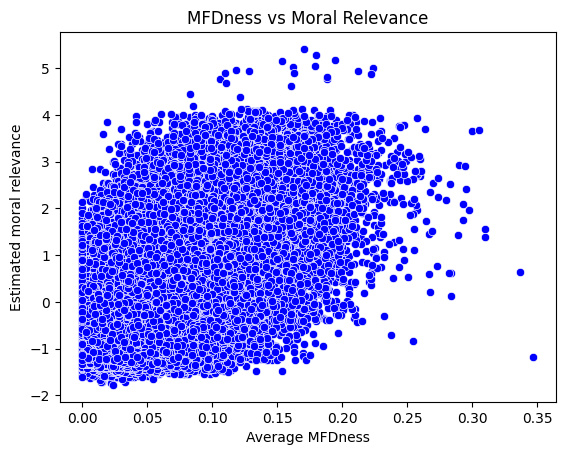

In [7]:
sns.scatterplot(x='average_mfdness', y='outputs_z', data=rel_df, color='blue')
plt.xlabel('Average MFDness')
plt.ylabel('Estimated moral relevance')

plt.title('MFDness vs Moral Relevance')
plt.show()

# Analyzing MFDness of diseases

In [9]:
diseases = ['anthrax', 'cancer', 'cholera', 'diabetes', 'diphtheria', 'flu',
       'hepatitis', 'hiv', 'hivaids', 'influenza', 'leukemia', 'malaria',
       'measles', 'plague', 'polio', 'salmonella', 'scarlet fever',
       'smallpox', 'tuberculosis', 'typhoid', 'typhus', 'yellow fever']
disease_ts_df = rel_df.loc[rel_df.words.isin(diseases)]


In [11]:
disease_ts_df

,words,year,property,count,outputs_z,property_z,average_mfdness
13243,anthrax,2000,previous_link,140.0,2.693128,2.693128,0.116171
44167,cancer,1880,previous_link,50.0,1.916354,1.916354,0.048230
44169,cancer,1910,previous_link,112.0,1.979026,1.979026,0.104228
44171,cancer,1920,previous_link,180.0,2.011112,2.011112,0.158505
44173,cancer,1930,previous_link,245.0,1.998660,1.998660,0.073784
...,...,...,...,...,...,...,...
327191,typhoid,1950,previous_link,58.0,1.625079,1.625079,0.207369
327221,typhus,1940,previous_link,75.0,1.992359,1.992359,0.088129
350851,yellow fever,1880,previous_link,74.0,1.588699,1.588699,0.146446
350853,yellow fever,1890,previous_link,52.0,1.592926,1.592926,0.142903


In [12]:
pearsonr(disease_ts_df.dropna().outputs_z, disease_ts_df.dropna().average_mfdness), len(disease_ts_df.dropna())

(PearsonRResult(statistic=0.08322826495656144, pvalue=0.3372067025171841), 135)

## Analyzing MFDness of political figures

In [13]:
leader_data = pd.read_csv('./data/wikipedia_political_ts_df.csv') #political leaders
counts = ts_df[['words','year','count']].drop_duplicates().groupby(['words','year'])[['count']].sum().to_dict()

leader_data

,index,Query,Term,Decade,Average_upcoming_frequency,Frequency_change,Moral_relevance,Moral_polarity,Peak_length,Word,...,Reg_R2,Coef,Reg_p,Modern_freq,future_freq_log,freq_log,log_change,log_max_peak_diff,log_modern_freq,Estimate
0,0,Zachary Taylor,1850,1850,5.410798e-07,-0.482930,2.067802,0.862863,7,president taylor,...,0.091257,-0.002300,1.034804e-04,2.200785e-07,-14.429699,-13.770123,-0.659576,-0.219880,-15.329282,NaN
1,1,Franklin Pierce,1853,1850,1.026276e-06,1.053307,1.199496,0.384998,4,president pierce,...,0.229293,-0.005289,2.243605e-10,1.759839e-07,-13.789574,-14.509026,0.719452,1.847694,-15.552873,NaN
2,2,Franklin Pierce,1857,1850,3.919661e-07,-0.601447,1.199496,0.384998,3,president pierce,...,0.171973,-0.004115,9.854237e-08,1.759839e-07,-14.752090,-13.832175,-0.919915,1.170844,-15.552873,NaN
3,3,James Buchanan,1861,1860,8.626538e-07,-0.312980,1.487039,0.469772,3,president buchanan,...,0.457099,-0.006998,3.062544e-21,2.369591e-07,-13.963252,-13.587860,-0.375392,0.695754,-15.255378,NaN
4,4,Abraham Lincoln,1865,1860,2.007673e-05,2.353997,1.408266,0.551051,2,president lincoln,...,0.098501,-0.003022,1.209849e-04,2.715327e-06,-10.815949,-12.026102,1.210153,1.210153,-12.816598,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,73,Georgy Malenkov,1953,1950,8.076138e-09,-0.650704,-1.242984,-0.772341,3,"Georgy Malenkov, malenkov",...,NaN,inf,NaN,5.679445e-09,-18.634352,-17.582517,-1.051835,-0.958416,-18.986412,NaN
74,74,Nikita Khrushchev,1964,1960,2.532742e-07,-0.951765,-0.500025,-0.228260,5,"Nikita Khrushchev, Khrushchev",...,0.144628,0.006439,9.131149e-03,2.649619e-07,-15.188793,-12.157130,-3.031663,-2.986550,-15.143680,NaN
75,75,Leonid Brezhnev,1982,1980,2.886638e-07,-0.939005,-0.709600,-0.728508,7,"Leonid Brezhnev, Brezhnev",...,0.533056,-0.033161,1.034227e-05,1.208460e-07,-15.058003,-12.261042,-2.796961,-3.078216,-15.928749,NaN
76,76,Yuri Andropov,1984,1980,1.346695e-07,-0.830653,-0.924460,-0.326490,7,"Yuri Andropov, Andropov",...,0.426805,-0.038392,2.962020e-04,4.291136e-08,-15.820442,-14.044634,-1.775808,-2.563907,-16.964129,NaN


In [14]:
leader_mfdness =[ ]
for i, row in leader_data.iterrows():
    politication_words = row['Word'].split(',')
    average = 0
    total = 0
    for word in politication_words:
        word = word.strip().replace('-','').lower()
        
        if (word, row['Decade']) in averages:
            average += averages[(word, row['Decade'])]
            total += 1
    if total > 0:
        average = average / total
    else:
        average = np.nan
    leader_mfdness.append(average)
leader_data['average_mfdness'] = leader_mfdness

In [15]:
from adjustText import adjust_text

In [16]:
leader_data

,index,Query,Term,Decade,Average_upcoming_frequency,Frequency_change,Moral_relevance,Moral_polarity,Peak_length,Word,...,Coef,Reg_p,Modern_freq,future_freq_log,freq_log,log_change,log_max_peak_diff,log_modern_freq,Estimate,average_mfdness
0,0,Zachary Taylor,1850,1850,5.410798e-07,-0.482930,2.067802,0.862863,7,president taylor,...,-0.002300,1.034804e-04,2.200785e-07,-14.429699,-13.770123,-0.659576,-0.219880,-15.329282,NaN,NaN
1,1,Franklin Pierce,1853,1850,1.026276e-06,1.053307,1.199496,0.384998,4,president pierce,...,-0.005289,2.243605e-10,1.759839e-07,-13.789574,-14.509026,0.719452,1.847694,-15.552873,NaN,NaN
2,2,Franklin Pierce,1857,1850,3.919661e-07,-0.601447,1.199496,0.384998,3,president pierce,...,-0.004115,9.854237e-08,1.759839e-07,-14.752090,-13.832175,-0.919915,1.170844,-15.552873,NaN,NaN
3,3,James Buchanan,1861,1860,8.626538e-07,-0.312980,1.487039,0.469772,3,president buchanan,...,-0.006998,3.062544e-21,2.369591e-07,-13.963252,-13.587860,-0.375392,0.695754,-15.255378,NaN,NaN
4,4,Abraham Lincoln,1865,1860,2.007673e-05,2.353997,1.408266,0.551051,2,president lincoln,...,-0.003022,1.209849e-04,2.715327e-06,-10.815949,-12.026102,1.210153,1.210153,-12.816598,NaN,0.110200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,73,Georgy Malenkov,1953,1950,8.076138e-09,-0.650704,-1.242984,-0.772341,3,"Georgy Malenkov, malenkov",...,inf,NaN,5.679445e-09,-18.634352,-17.582517,-1.051835,-0.958416,-18.986412,NaN,0.056142
74,74,Nikita Khrushchev,1964,1960,2.532742e-07,-0.951765,-0.500025,-0.228260,5,"Nikita Khrushchev, Khrushchev",...,0.006439,9.131149e-03,2.649619e-07,-15.188793,-12.157130,-3.031663,-2.986550,-15.143680,NaN,0.058159
75,75,Leonid Brezhnev,1982,1980,2.886638e-07,-0.939005,-0.709600,-0.728508,7,"Leonid Brezhnev, Brezhnev",...,-0.033161,1.034227e-05,1.208460e-07,-15.058003,-12.261042,-2.796961,-3.078216,-15.928749,NaN,0.106514
76,76,Yuri Andropov,1984,1980,1.346695e-07,-0.830653,-0.924460,-0.326490,7,"Yuri Andropov, Andropov",...,-0.038392,2.962020e-04,4.291136e-08,-15.820442,-14.044634,-1.775808,-2.563907,-16.964129,NaN,0.034197


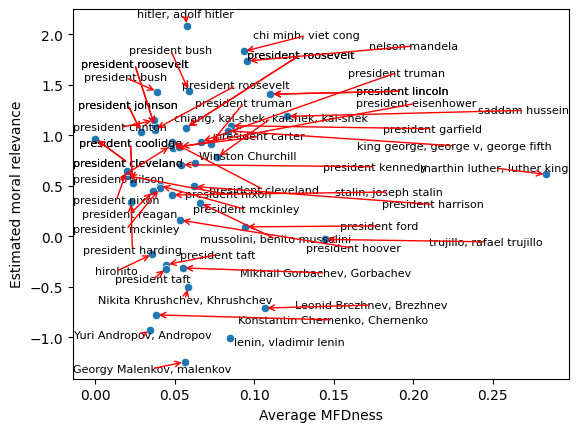

In [30]:
sns.scatterplot(data=leader_data, x='average_mfdness', y='Moral_relevance')
annotations = []
for i, row in leader_data.iterrows():
    if pd.isna(row['average_mfdness']) or pd.isna(row['Moral_relevance']):
        continue
    annotations.append(plt.text(row['average_mfdness'], row['Moral_relevance'], row['Word'], fontsize=8, ha='right'))

adjust_text(annotations, arrowprops=dict(arrowstyle='->', color='red', lw=1), force_points=0.5, force_text=0.5, expand_text=(1.05, 1.05), expand_points=(1.05, 1.05))
plt.xlabel('Average MFDness')
plt.ylabel('Estimated moral relevance')
plt.show()

In [19]:
leader_data = leader_data.loc[~pd.isna(leader_data['average_mfdness']) & ~pd.isna(leader_data['Moral_relevance'])]
len(leader_data)

54

In [20]:
pearsonr(leader_data.Moral_relevance, leader_data.average_mfdness)

PearsonRResult(statistic=0.036369066737813274, pvalue=0.7940232478842879)

In [21]:
leader_data_grouped = leader_data.groupby(['Query'])[['average_mfdness','Moral_relevance']].mean().reset_index().dropna()
pearsonr(leader_data_grouped.Moral_relevance, leader_data_grouped.average_mfdness)

PearsonRResult(statistic=0.05522490191869526, pvalue=0.7283188778370013)

### Conclusion: There's no statistically significant correlation betwween moral relevance scores and degree of co-occurance with MFD words for political leaders, however, these two metrics tend to have a positive correlation with each other using all (word,year) points.

# Average MFDness vs empirical moral association scores

In [23]:
word_year_df.year.max()

2000

In [24]:
from sklearn.metrics import r2_score

In [30]:
test_results_path ='./data/SWOW_prediction/eval/'
model_name = 'bert-base-uncased'
reduce = 'forward'
data_name = 'coha'
train_sections = np.arange(0, 5)
loss_function_name = 'likelihood_loss'
graph_strategy = 'ppmi'
token_strategy ='frequency'
graph_version = 2
swow_version = 1
fill = 'add'
train_section = 0
add_self_loops = True
section = 'test'
baselines = False
properties = ['previous_link','polarity']
results = []
for property in properties:
    target_dir = test_results_path + f'{property}_{model_name}_{reduce}_{data_name}_{train_section}_{loss_function_name}_graph_{graph_strategy}_graph_version_{graph_version}_swow_version_{swow_version}_fill_{fill}_add_self_loops_{add_self_loops}_token_strategy_{token_strategy}_{section}.csv'
    target_df = pd.read_csv(target_dir)   
    property_mfdnss = word_year_df.loc[(word_year_df.words.isin(target_df.words)) &\
                                        (word_year_df.year == 2000)]
    property_mfdnss['targets'] = property_mfdnss.words.apply(lambda w: target_df.loc[target_df.words == w].targets.mean())
    r, p =pearsonr(property_mfdnss.targets, property_mfdnss.average_mfdness)
    n = len(property_mfdnss.words.unique())
    r2 = r2_score(property_mfdnss.targets, property_mfdnss.average_mfdness)
    results.append({
        'property':property,
        'n':n,
        'r':r,
        'p':p,
        'r2':r2

        
    })

        
        

In [31]:
pd.DataFrame(results)

,property,n,r,p,r2
0,previous_link,936,0.465176,1.960856e-51,-4.933876
1,polarity,835,-0.063210,6.790811e-02,-412.936132
